---
# **Sales Analysis**
---

In [ ]:
#we will first be dealing with table: sales_data

In [1]:
#importing dependencies
import pandas as pd
import numpy as np

In [2]:
#Reading Dataset as Excel Form
df_sales=pd.read_excel('/home/jishant/Desktop/Project/sales_data.xlsx')

In [3]:
df_sales.head() #Print first 5 Rows

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#checking if it has missing values
df_sales.isnull().sum()

transaction id                0
product id                    0
product description        1454
quantity sold                 0
transaction timestamp         0
unit price                    0
customer id              135080
transaction country           0
dtype: int64

In [5]:
#transcation_id,customer_id,product_id these are redundant features.
df_sales=df_sales.drop(['transaction id','product id','customer id'],axis=1)

In [7]:
df_sales.head()

,product description,quantity sold,transaction timestamp,unit price,transaction country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


---
## Analysis 1: Number of transcations per country¶
---

In [8]:
#now we will be having a look at different countries where the order is placed from
print(set(df_sales['transaction country']))
print('Total number of countries:',len(set(df_sales['transaction country'])))

{'Portugal', 'Saudi Arabia', 'Channel Islands', 'Cyprus', 'Lithuania', 'Iceland', 'France', 'Brazil', 'Spain', 'USA', 'EIRE', 'Canada', 'Singapore', 'Belgium', 'Hong Kong', 'Poland', 'Greece', 'Switzerland', 'Finland', 'Bahrain', 'United Kingdom', 'Israel', 'Netherlands', 'Norway', 'Italy', 'Unspecified', 'RSA', 'Sweden', 'Australia', 'Malta', 'Lebanon', 'Japan', 'Austria', 'United Arab Emirates', 'Denmark', 'European Community', 'Czech Republic', 'Germany'}
Total number of countries: 38


In [9]:
#now counting how many transcations from each country in a span of 12 months
country_wise_transcount={}
for i in df_sales['transaction country']:
    if i not in country_wise_transcount.keys():
        country_wise_transcount.update({i:1}) #Maintaining a Map {Country:Count}
    else:
        country_wise_transcount[i]+=1
print(country_wise_transcount) #this will give me total count of transaction per country

{'United Kingdom': 495478, 'France': 8557, 'Australia': 1259, 'Netherlands': 2371, 'Germany': 9495, 'Norway': 1086, 'EIRE': 8196, 'Switzerland': 2002, 'Spain': 2533, 'Poland': 341, 'Portugal': 1519, 'Italy': 803, 'Belgium': 2069, 'Lithuania': 35, 'Japan': 358, 'Iceland': 182, 'Channel Islands': 758, 'Denmark': 389, 'Cyprus': 622, 'Sweden': 462, 'Austria': 401, 'Israel': 297, 'Finland': 695, 'Bahrain': 19, 'Greece': 146, 'Hong Kong': 288, 'Singapore': 229, 'Lebanon': 45, 'United Arab Emirates': 68, 'Saudi Arabia': 10, 'Czech Republic': 30, 'Canada': 151, 'Unspecified': 446, 'Brazil': 32, 'USA': 291, 'European Community': 61, 'Malta': 127, 'RSA': 58}


---
## Analysis 2: Finding the country with Minimum and Maximum transaction
---

In [11]:
max_trans=max(country_wise_transcount.values())
min_trans=min(country_wise_transcount.values())
for i in country_wise_transcount:
    if country_wise_transcount[i]==max_trans:
        print('Max transactions are from',i,':',max_trans)
    if country_wise_transcount[i]==min_trans:
        print('Min transactions are from',i,':',min_trans)

Max transactions are from United Kingdom : 495478
Min transactions are from Saudi Arabia : 10


---
## Analysis 3: Quantity sold per country
---

In [12]:
qty_sold_per_country={}
val=0
for j,k in df_sales.iterrows():
    val=k[1]
    if k[4] not in qty_sold_per_country.keys():
        qty_sold_per_country.update({k[4]:val}) #Maintaining a Map {Country:Amount}
    else:
        qty_sold_per_country[k[4]]+=val
print(qty_sold_per_country)    

{'United Kingdom': 4263829, 'France': 110480, 'Australia': 83653, 'Netherlands': 200128, 'Germany': 117448, 'Norway': 19247, 'EIRE': 142637, 'Switzerland': 30325, 'Spain': 26824, 'Poland': 3653, 'Portugal': 16180, 'Italy': 7999, 'Belgium': 23152, 'Lithuania': 652, 'Japan': 25218, 'Iceland': 2458, 'Channel Islands': 9479, 'Denmark': 8188, 'Cyprus': 6317, 'Sweden': 35637, 'Austria': 4827, 'Israel': 4353, 'Finland': 10666, 'Bahrain': 260, 'Greece': 1556, 'Hong Kong': 4769, 'Singapore': 5234, 'Lebanon': 386, 'United Arab Emirates': 982, 'Saudi Arabia': 75, 'Czech Republic': 592, 'Canada': 2763, 'Unspecified': 3300, 'Brazil': 356, 'USA': 1034, 'European Community': 497, 'Malta': 944, 'RSA': 352}


---
## Analysis 4: Finding average quantity sold per transaction 
---

In [13]:
avg_qty_per_trans={}
for i in qty_sold_per_country:
    avg=qty_sold_per_country[i]/country_wise_transcount[i]
    avg_qty_per_trans.update({i:avg})
print(avg_qty_per_trans)

{'United Kingdom': 8.605486015524402, 'France': 12.91106696272058, 'Australia': 66.4440031771247, 'Netherlands': 84.4065795023197, 'Germany': 12.369457609268036, 'Norway': 17.722836095764272, 'EIRE': 17.40324548560273, 'Switzerland': 15.147352647352648, 'Spain': 10.58981444926964, 'Poland': 10.712609970674487, 'Portugal': 10.65174456879526, 'Italy': 9.961394769613948, 'Belgium': 11.18994683421943, 'Lithuania': 18.62857142857143, 'Japan': 70.44134078212291, 'Iceland': 13.505494505494505, 'Channel Islands': 12.505277044854882, 'Denmark': 21.04884318766067, 'Cyprus': 10.155948553054662, 'Sweden': 77.13636363636364, 'Austria': 12.037406483790523, 'Israel': 14.656565656565656, 'Finland': 15.346762589928058, 'Bahrain': 13.68421052631579, 'Greece': 10.657534246575343, 'Hong Kong': 16.55902777777778, 'Singapore': 22.85589519650655, 'Lebanon': 8.577777777777778, 'United Arab Emirates': 14.441176470588236, 'Saudi Arabia': 7.5, 'Czech Republic': 19.733333333333334, 'Canada': 18.29801324503311, 'U

In [15]:
#now finding the minimum and maximum average quantity sold per transaction with country name
max_avg_trans=max(avg_qty_per_trans.values())
min_avg_trans=min(avg_qty_per_trans.values())
for i in avg_qty_per_trans:
    if avg_qty_per_trans[i]==max_avg_trans:
        print('Max avg qty per transaction is from:',i,':',max_avg_trans)
    if avg_qty_per_trans[i]==min_avg_trans:
        print('Min avg qty per transaction is from:',i,':',min_avg_trans)

Max avg qty per transaction is from: Netherlands : 84.4065795023197
Min avg qty per transaction is from: USA : 3.5532646048109964


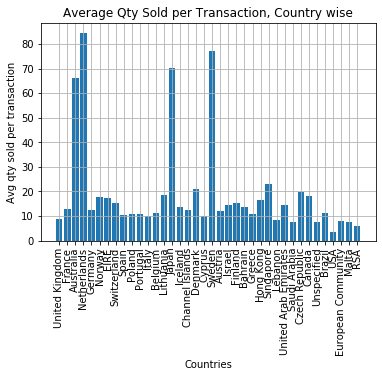

In [16]:
import matplotlib.pyplot as plt

plt.title('Average Qty Sold per Transaction, Country wise')
plt.xlabel('Countries') #x axis
plt.ylabel('Avg qty sold per transaction') #y axis
plt.xticks(rotation=90) #rotating the name of the countries by 90 degrees
plt.bar(list(avg_qty_per_trans.keys()),list(avg_qty_per_trans.values()),width=0.8,label='Qty sold per Transaction')
plt.grid()

In [ ]:
#we need a column were it would show the total price= qty*unit price

---
## Analysis 5: Finding avg Total cost per Transaction 
---

In [ ]:
#total cost= qty*unit price

In [18]:
sales=df_sales

In [19]:
sales['total cost']=sales['quantity sold']*sales['unit price']

In [20]:
sales.head()

,product description,quantity sold,transaction timestamp,unit price,transaction country,total cost
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [21]:
countrywise_total_cost={}
amt=0
for i,j in sales.iterrows():
    amt=j[5]
    if j[4] not in countrywise_total_cost.keys():
        countrywise_total_cost.update({j[4]:amt})
    else:
        countrywise_total_cost[j[4]]+=amt
print(countrywise_total_cost)

{'United Kingdom': 8187806.364001113, 'France': 197403.90000000002, 'Australia': 137077.26999999973, 'Netherlands': 284661.54000000015, 'Germany': 221698.20999999862, 'Norway': 35163.46000000004, 'EIRE': 263276.81999999826, 'Switzerland': 56385.35000000009, 'Spain': 54774.57999999997, 'Poland': 7213.139999999997, 'Portugal': 29367.019999999993, 'Italy': 16890.510000000002, 'Belgium': 40910.95999999998, 'Lithuania': 1661.06, 'Japan': 35340.62, 'Iceland': 4309.999999999997, 'Channel Islands': 20086.289999999957, 'Denmark': 18768.140000000003, 'Cyprus': 12946.289999999999, 'Sweden': 36595.91, 'Austria': 10154.319999999996, 'Israel': 7907.819999999995, 'Finland': 22326.73999999997, 'Bahrain': 548.4, 'Greece': 4710.5199999999995, 'Hong Kong': 10117.040000000003, 'Singapore': 9120.39, 'Lebanon': 1693.8800000000003, 'United Arab Emirates': 1902.2800000000007, 'Saudi Arabia': 131.17, 'Czech Republic': 707.72, 'Canada': 3666.380000000001, 'Unspecified': 4749.789999999996, 'Brazil': 1143.6000000

In [24]:
#now finding the average total cost
avg_total_cost={}
for i in countrywise_total_cost:
    avg_cost=countrywise_total_cost[i]/country_wise_transcount[i]
    if i not in avg_total_cost.keys():
        avg_total_cost.update({i:avg_cost})
    else:
        avg_total_cost[i]+=avg_cost
print(avg_total_cost)

{'United Kingdom': 16.525065419657608, 'France': 23.069288301974993, 'Australia': 108.87789515488461, 'Netherlands': 120.05969633066223, 'Germany': 23.348942601368996, 'Norway': 32.378876611418086, 'EIRE': 32.12259882869672, 'Switzerland': 28.164510489510537, 'Spain': 21.624390051322532, 'Poland': 21.15290322580644, 'Portugal': 19.333127057274517, 'Italy': 21.034259028642595, 'Belgium': 19.773301111648127, 'Lithuania': 47.45885714285714, 'Japan': 98.7168156424581, 'Iceland': 23.681318681318665, 'Channel Islands': 26.499063324538202, 'Denmark': 48.24714652956299, 'Cyprus': 20.813971061093245, 'Sweden': 79.21192640692641, 'Austria': 25.322493765586024, 'Israel': 26.62565656565655, 'Finland': 32.12480575539564, 'Bahrain': 28.86315789473684, 'Greece': 32.26383561643835, 'Hong Kong': 35.12861111111112, 'Singapore': 39.82703056768559, 'Lebanon': 37.64177777777778, 'United Arab Emirates': 27.97470588235295, 'Saudi Arabia': 13.116999999999999, 'Czech Republic': 23.590666666666667, 'Canada': 24

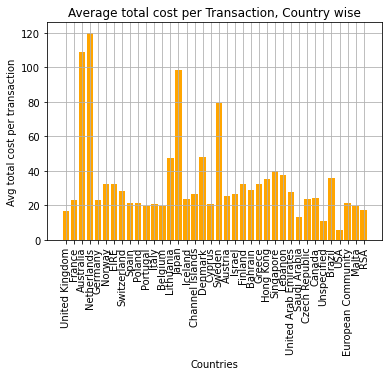

In [25]:
#visualizing avg total cost, countrywise
plt.title('Average total cost per Transaction, Country wise')
plt.xlabel('Countries') #x axis
plt.ylabel('Avg total cost per transaction') #y axis
plt.xticks(rotation=90) #rotating the name of the countries by 90 degrees
plt.bar(list(avg_total_cost.keys()),list(avg_total_cost.values()),width=0.8,label='Avg total cost per Transaction',color='orange')
plt.grid()
plt.show()

---
## Analysis 6: Report comparing Avg. Qty per Trans and Avg. Total cost per Trans
---

In [26]:
df_report_sales=pd.DataFrame()
df_report_sales['Country']=avg_total_cost.keys()
df_report_sales['Avg Qty per Trans']=avg_qty_per_trans.values()
df_report_sales['Avg total cost per Trans']=avg_total_cost.values()
print(df_report_sales)

                 Country  Avg Qty per Trans  Avg total cost per Trans
0         United Kingdom           8.605486                 16.525065
1                 France          12.911067                 23.069288
2              Australia          66.444003                108.877895
3            Netherlands          84.406580                120.059696
4                Germany          12.369458                 23.348943
5                 Norway          17.722836                 32.378877
6                   EIRE          17.403245                 32.122599
7            Switzerland          15.147353                 28.164510
8                  Spain          10.589814                 21.624390
9                 Poland          10.712610                 21.152903
10              Portugal          10.651745                 19.333127
11                 Italy           9.961395                 21.034259
12               Belgium          11.189947                 19.773301
13             Lithu

In [27]:
#printing ranks of avg qty sold per transaction in desc. 
report_qty={}
print('Rank of Counteries on avg qty sold per transaction')
print()
for key,value in avg_qty_per_trans.items():
    report_qty.update({value:key})
report=sorted(report_qty,reverse=True)
#print(report)
j=1
for i in report:
    print(j,report_qty[i],":",i)
    j+=1

Rank of Counteries on avg qty sold per transaction

1 Netherlands : 84.4065795023197
2 Sweden : 77.13636363636364
3 Japan : 70.44134078212291
4 Australia : 66.4440031771247
5 Singapore : 22.85589519650655
6 Denmark : 21.04884318766067
7 Czech Republic : 19.733333333333334
8 Lithuania : 18.62857142857143
9 Canada : 18.29801324503311
10 Norway : 17.722836095764272
11 EIRE : 17.40324548560273
12 Hong Kong : 16.55902777777778
13 Finland : 15.346762589928058
14 Switzerland : 15.147352647352648
15 Israel : 14.656565656565656
16 United Arab Emirates : 14.441176470588236
17 Bahrain : 13.68421052631579
18 Iceland : 13.505494505494505
19 France : 12.91106696272058
20 Channel Islands : 12.505277044854882
21 Germany : 12.369457609268036
22 Austria : 12.037406483790523
23 Belgium : 11.18994683421943
24 Brazil : 11.125
25 Poland : 10.712609970674487
26 Greece : 10.657534246575343
27 Portugal : 10.65174456879526
28 Spain : 10.58981444926964
29 Cyprus : 10.155948553054662
30 Italy : 9.961394769613948


In [29]:
report_tc={}
print('Rank of Counteries on avg total cost per transaction')
for key,value in avg_total_cost.items():
    report_tc.update({value:key})
tc_report=sorted(report_tc,reverse=True)
#print(report)
j=1
for i in tc_report:
    print(j,report_tc[i],":",i)
    j+=1

Rank of Counteries on avg total cost per transaction
1 Netherlands : 120.05969633066223
2 Australia : 108.87789515488461
3 Japan : 98.7168156424581
4 Sweden : 79.21192640692641
5 Denmark : 48.24714652956299
6 Lithuania : 47.45885714285714
7 Singapore : 39.82703056768559
8 Lebanon : 37.64177777777778
9 Brazil : 35.737500000000004
10 Hong Kong : 35.12861111111112
11 Norway : 32.378876611418086
12 Greece : 32.26383561643835
13 Finland : 32.12480575539564
14 EIRE : 32.12259882869672
15 Bahrain : 28.86315789473684
16 Switzerland : 28.164510489510537
17 United Arab Emirates : 27.97470588235295
18 Israel : 26.62565656565655
19 Channel Islands : 26.499063324538202
20 Austria : 25.322493765586024
21 Canada : 24.280662251655635
22 Iceland : 23.681318681318665
23 Czech Republic : 23.590666666666667
24 Germany : 23.348942601368996
25 France : 23.069288301974993
26 Spain : 21.624390051322532
27 European Community : 21.17622950819672
28 Poland : 21.15290322580644
29 Italy : 21.034259028642595
30 Cyp

In [ ]:
#now coming to the second table: date

In [30]:
#reading excel file
df_date=pd.read_excel('/home/jishant/Desktop/Project/date.xlsx')

In [31]:
df_date.head()

,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [32]:
len(set(df_date['month_of_year'])) #to see the unique values

12

In [33]:
#to see what all days are there
set(df_date['day_name']) #saturday is not there in the dataset

{'Friday', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [34]:
final_table=sales
final_table.head()

,product description,quantity sold,transaction timestamp,unit price,transaction country,total cost
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [35]:
final_table['day_name']=df_date['day_name']

In [36]:
final_table.head()

,product description,quantity sold,transaction timestamp,unit price,transaction country,total cost,day_name
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,Wednesday
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,Wednesday
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday


In [37]:
final_table.shape

(541909, 7)

---
## Analysis 7: Day wise transactions
---

In [38]:
day_count={}
for i,j in final_table.iterrows():
    if j[6] not in day_count.keys():
        day_count.update({j[6]:1})
    else:
        day_count[j[6]]+=1
print(day_count)
print(day_count.keys())

{'Wednesday': 94565, 'Thursday': 103857, 'Friday': 82193, 'Sunday': 64375, 'Monday': 95111, 'Tuesday': 101808}
dict_keys(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'])


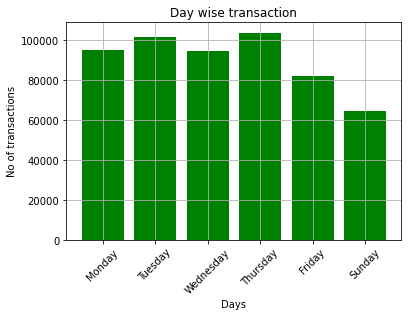

In [39]:
#visualising the data
import matplotlib.pyplot as plt

days=['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']

plt.title('Day wise transaction')
plt.xlabel('Days')
plt.ylabel('No of transactions')
plt.xticks(rotation=45)
plt.bar(days,[day_count[i] for i in days],color='g')
plt.grid()
plt.show()

In [ ]:
#now day wise total cost

In [40]:
day_wise_tc={}
for i,j in final_table.iterrows():
    tc=j[5]
    if j[6] not in day_wise_tc.keys():
        day_wise_tc.update({j[6]:tc})
    else:
        day_wise_tc[j[6]]+=tc
day_wise_tc

{'Wednesday': 1734147.0099997583,
 'Thursday': 2112518.999999767,
 'Friday': 1540610.8109998337,
 'Sunday': 805678.8910000041,
 'Monday': 1588609.4309997542,
 'Tuesday': 1966182.7909996351}

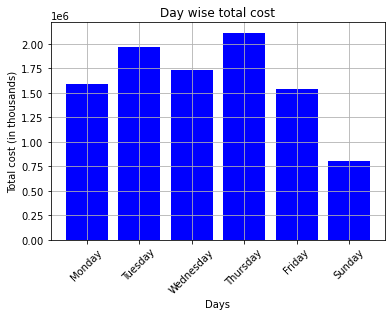

In [41]:
plt.title('Day wise total cost')
plt.xlabel('Days')
plt.ylabel('Total cost (in thousands)')
plt.xticks(rotation=45)
plt.bar(days,[day_wise_tc[i] for i in days],color='blue')
plt.grid()
plt.show()

---
## Analysis 8: At what time does the company make most revenue (morning, noon or evening)
---

In [42]:
#to check the time frame in hours that is being recorded against each transaction
diff_hours=[]
for i in final_table['transaction timestamp']:
    trans_detail=i
    h=int(str(trans_detail)[11:13]) #hour
    diff_hours.append(h)
set(diff_hours) #so the transaction has taken place from 6 am till at max 9pm

{6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

In [ ]:
#6:00-10:59=morning
#11:00-15:59=noon
#16:00-21:00=evening
#have segregated them into 3 slots of 5 hours each

In [43]:
trans_detail=''
day_part=['Morning','Afternoon','Evening']
day_dict={}
for i in final_table['transaction timestamp']:
    trans_detail=i
    h=int(str(trans_detail)[11:13])
    m=int(str(trans_detail)[14:16])
    if h<=10 and m<=59:
        if day_part[0] not in day_dict.keys():
            day_dict.update({day_part[0]:1})
        else:
            day_dict[day_part[0]]+=1
    if (h>=11 and h<16):
        if day_part[1] not in day_dict.keys():
            day_dict.update({day_part[1]:1})
        else:
            day_dict[day_part[1]]+=1
    if h>=16 and h<21:
        if day_part[2] not in day_dict.keys():
            day_dict.update({day_part[2]:1})
        else:
            day_dict[day_part[2]]+=1
print(day_dict)   

{'Morning': 92702, 'Afternoon': 353632, 'Evening': 95575}


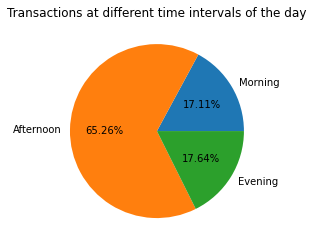

In [44]:
plt.title('Transactions at different time intervals of the day')
plt.pie([day_dict[i] for i in day_part],labels=day_part,autopct='%1.2f%%')
plt.grid()
plt.show()

---
## Analysis 9: Day of the week with most number of transactions, countrywise
---

In [45]:
final_table.head()

,product description,quantity sold,transaction timestamp,unit price,transaction country,total cost,day_name
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,Wednesday
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,Wednesday
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday


In [58]:
daywise_trans_percountry={}
#day_of_week={}
for i,j in final_table.iterrows():
    if j[4] not in daywise_trans_percountry.keys():
        daywise_trans_percountry.update({j[4]:{}})
        if j[6] not in daywise_trans_percountry[j[4]].keys():
            #print('hello')
            daywise_trans_percountry[j[4]].update({j[6]:1})
    if j[4] in daywise_trans_percountry.keys():
        if j[4] in daywise_trans_percountry.keys():
            if j[6] not in daywise_trans_percountry[j[4]].keys():
                daywise_trans_percountry[j[4]].update({j[6]:1})
            else:
                daywise_trans_percountry[j[4]][j[6]]+=1

In [59]:
for i in daywise_trans_percountry:
    print(i,daywise_trans_percountry[i])

United Kingdom {'Wednesday': 86152, 'Thursday': 93303, 'Friday': 73504, 'Sunday': 61133, 'Monday': 87400, 'Tuesday': 93987}
France {'Wednesday': 1880, 'Friday': 1611, 'Sunday': 649, 'Tuesday': 1284, 'Thursday': 1834, 'Monday': 1300}
Australia {'Wednesday': 323, 'Tuesday': 331, 'Friday': 102, 'Thursday': 394, 'Monday': 58, 'Sunday': 52}
Netherlands {'Wednesday': 353, 'Monday': 340, 'Tuesday': 640, 'Friday': 346, 'Thursday': 632, 'Sunday': 61}
Germany {'Wednesday': 1409, 'Thursday': 2293, 'Friday': 1967, 'Sunday': 797, 'Monday': 1753, 'Tuesday': 1277}
Norway {'Wednesday': 300, 'Tuesday': 135, 'Thursday': 127, 'Monday': 135, 'Friday': 374, 'Sunday': 16}
EIRE {'Wednesday': 1466, 'Thursday': 1511, 'Friday': 1631, 'Monday': 1670, 'Sunday': 520, 'Tuesday': 1399}
Switzerland {'Friday': 382, 'Monday': 98, 'Wednesday': 524, 'Thursday': 287, 'Tuesday': 456, 'Sunday': 256}
Spain {'Friday': 355, 'Thursday': 662, 'Monday': 458, 'Tuesday': 343, 'Wednesday': 382, 'Sunday': 334}
Poland {'Friday': 65, '

In [72]:
countrywise_day={}
for i in daywise_trans_percountry:
    day_wise_transpercountry={}
    #print(daywise_trans_percountry[i])
    for key,value in daywise_trans_percountry[i].items():
        day_wise_transpercountry.update({value:key})
    max_value=max(list(day_wise_transpercountry.keys()))
    #print(max_value)
    countrywise_day.update({i:day_wise_transpercountry[max_value]})

In [73]:
countrywise_day

{'United Kingdom': 'Tuesday',
 'France': 'Wednesday',
 'Australia': 'Thursday',
 'Netherlands': 'Tuesday',
 'Germany': 'Thursday',
 'Norway': 'Friday',
 'EIRE': 'Monday',
 'Switzerland': 'Wednesday',
 'Spain': 'Thursday',
 'Poland': 'Wednesday',
 'Portugal': 'Thursday',
 'Italy': 'Tuesday',
 'Belgium': 'Thursday',
 'Lithuania': 'Sunday',
 'Japan': 'Wednesday',
 'Iceland': 'Tuesday',
 'Channel Islands': 'Wednesday',
 'Denmark': 'Thursday',
 'Cyprus': 'Friday',
 'Sweden': 'Friday',
 'Austria': 'Monday',
 'Israel': 'Thursday',
 'Finland': 'Tuesday',
 'Bahrain': 'Monday',
 'Greece': 'Monday',
 'Hong Kong': 'Tuesday',
 'Singapore': 'Tuesday',
 'Lebanon': 'Thursday',
 'United Arab Emirates': 'Thursday',
 'Saudi Arabia': 'Thursday',
 'Czech Republic': 'Monday',
 'Canada': 'Monday',
 'Unspecified': 'Thursday',
 'Brazil': 'Friday',
 'USA': 'Monday',
 'European Community': 'Thursday',
 'Malta': 'Monday',
 'RSA': 'Thursday'}

---
## Analysis 10: Finding the trend via total cost
---

In [49]:
months=['Dec 2010','Jan 2011','Feb 2011','Mar 2011','Apr 2011','May 2011','Jun 2011',
        'Jul 2011','Aug 2011','Sep 2011','Oct 2011','Nov 2011','Dec 2011']
#finding string indices of month and year
print(int(str(final_table['transaction timestamp'].head()[1])[5:7]))

12


In [50]:
daily_rev=0
monthly_rev={}
for i in range(final_table.shape[0]):
    if int(str(final_table['transaction timestamp'][i])[:4])==2010: 
        #Dec 2010
        month=months[0]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
    
    elif int(str(final_table['transaction timestamp'][i])[:4])==2011 and int(str(final_table['transaction timestamp'][i])[5:7])==12:
        #Dec 2011
        month=months[12]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==1:
        #Jan 2011
        month=months[1]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==2:
        #Feb 2011
        month=months[2]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==3:
        #Mar 2011
        month=months[3]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==4:
        #Apr 2011
        month=months[4]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==5:
        #May 2011
        month=months[5]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==6:
        #Jun 2011
        month=months[6]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
            
    elif int(str(final_table['transaction timestamp'][i])[5:7])==7:
        #Jul 2011
        month=months[7]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==8:
        #Aug 2011
        month=months[8]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==9:
        #Sep 2011
        month=months[9]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==10:
        #Oct 2011
        month=months[10]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==11:
        #Nov 2011
        month=months[11]
        daily_rev=final_table['total cost'][i]
        if month not in monthly_rev.keys():
            monthly_rev.update({month:daily_rev})
        else:
            monthly_rev[month]+=daily_rev

In [51]:
monthly_rev

{'Dec 2010': 748957.0199999774,
 'Jan 2011': 560000.2600000234,
 'Feb 2011': 498062.6500000268,
 'Mar 2011': 683267.0800000189,
 'Apr 2011': 493207.1210000249,
 'May 2011': 723333.51000001,
 'Jun 2011': 691123.1200000228,
 'Jul 2011': 681300.1110000301,
 'Aug 2011': 682680.5100000176,
 'Sep 2011': 1019687.622000011,
 'Oct 2011': 1070704.669999975,
 'Nov 2011': 1461756.2499997574,
 'Dec 2011': 433668.0100000171}

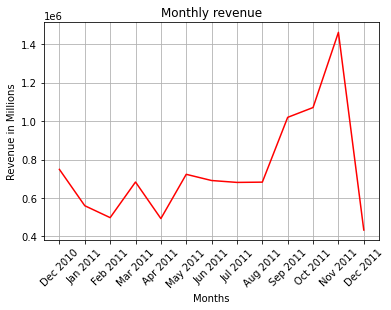

In [52]:
#now visualizing

plt.title('Monthly revenue')
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.ylabel('Revenue in Millions')
plt.plot(months,[monthly_rev[i] for i in months],color='red')
plt.grid()
plt.show()

---
## Analysis 11: Month wise transactions 
---

In [74]:
final_table.head()

,product description,quantity sold,transaction timestamp,unit price,transaction country,total cost,day_name
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,Wednesday
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,Wednesday
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday


In [78]:
monthly_trans={}
for i in range(final_table.shape[0]):
    if int(str(final_table['transaction timestamp'][i])[:4])==2010: 
        #Dec 2010
        month=months[0]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1
            
    elif int(str(final_table['transaction timestamp'][i])[:4])==2011 and int(str(final_table['transaction timestamp'][i])[5:7])==12:
        #Dec 2011
        month=months[12]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==1: 
        #Jan 2011
        month=months[1]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1
   
    elif int(str(final_table['transaction timestamp'][i])[5:7])==2: 
        #Feb 2011
        month=months[2]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==3: 
        #Mar 2011
        month=months[3]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==4: 
        #Apr 2011
        month=months[4]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1

    elif int(str(final_table['transaction timestamp'][i])[5:7])==5: 
        #May 2011
        month=months[5]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1

    elif int(str(final_table['transaction timestamp'][i])[5:7])==6: 
        #Jun 2011
        month=months[6]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1

    elif int(str(final_table['transaction timestamp'][i])[5:7])==7: 
        #Jul 2011
        month=months[1]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==8: 
        #Aug 2011
        month=months[8]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1

    elif int(str(final_table['transaction timestamp'][i])[5:7])==9: 
        #Sep 2011
        month=months[9]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==10: 
        #Oct 2011
        month=months[10]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1
    
    elif int(str(final_table['transaction timestamp'][i])[5:7])==11: 
        #Nov 2011
        month=months[11]
        if month not in monthly_trans.keys():
            monthly_trans.update({month:1})
        else:
            monthly_trans[month]+=1
    

In [79]:
monthly_trans

{'Dec 2010': 42481,
 'Jan 2011': 74665,
 'Feb 2011': 27707,
 'Mar 2011': 36748,
 'Apr 2011': 29916,
 'May 2011': 37030,
 'Jun 2011': 36874,
 'Aug 2011': 35284,
 'Sep 2011': 50226,
 'Oct 2011': 60742,
 'Nov 2011': 84711,
 'Dec 2011': 25525}

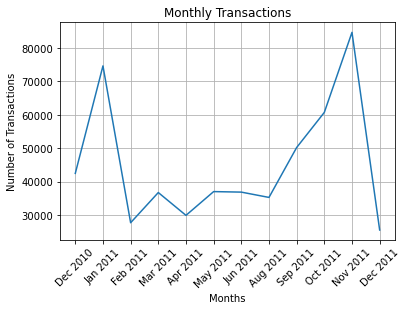

In [86]:
plt.plot(list(monthly_trans.keys()),list(monthly_trans.values()))
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions')
plt.grid()